<a href="https://colab.research.google.com/github/amohd63/ENCS5141-INTELLIGENT-SYSTEMS-LAB/blob/main/Manual_ENCS5141_Exp3_case_study_3_1_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Case Study 3.1**
In this case study, you will perform essential data preprocessing steps on the Penguins dataset. The dataset contains information about different species of penguins, including their physical characteristics and the region where they were observed. Your goal is to prepare the dataset for machine learning analysis. Follow these steps:
1. Load the penguins dataset using the code snippet provided below.
2. Perform initial data exploration to understand the dataset's structure, features, and any missing values. Summarize the dataset's statistics and gain insights into the data.
3. Address any data quality issues, such as missing values and outliers. Decide on an appropriate strategy for handling missing data, such as imputation or removal of rows/columns.
4. Analyze the relevance of each feature for your machine learning task by using the learned use feature selection technques.
5. If the dataset contains categorical variables, encode them into a numerical format suitable for machine learning models.
6. Split the dataset into training and testing subsets to evaluate the performance of your machine learning models.
7. Scale or normalize the numerical features to ensure consistent scaling across variables.
8. Apply suitable dimensionality reduction techniques to reduce the size of the data while preserving important information.
9. Validate your preprocessing pipeline by training and evaluating a machine learning model, such as the Random Forest model, on the preprocessed data. Compare the results to the model trained on the raw data (before feature filtering, transformation, and reduction) to ensure that preprocessing has improved model performance.







## 1. Load the penguins dataset using the code snippet provided below.

In [ ]:
# Import the 'load_dataset' function from seaborn to load the penguins dataset
from seaborn import load_dataset

# Load the penguins dataset and store it in the 'df' DataFrame
df = load_dataset('penguins')

# Display the first few rows of the DataFrame to get an initial look at the data
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We loaded the required dataset, then we displayed the first few rows in order to take a quick look at the data. It's clear that we got **missing values**. Also, we have ***7 columns***: species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex.

## 2. Perform initial data exploration to understand the dataset's structure, features, and any missing values. Summarize the dataset's statistics and gain insights into the data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Data exploration

#### Central tendency

Mean, median, mode

In [ ]:
# Calculate the mean for each column in the DataFrame
Mean = df.mean()
print(f"Mean values: {Mean.values}\n")

# Calculate the median for each column in the DataFrame
Median = df.median()
print(f"Median values: {Median.values}\n")

# Calculate the mode for each column in the DataFrame
Mode = df.mode().values
print(f"Mode values: {Mode}\n")

Mean values: [  43.92192982   17.15116959  200.91520468 4201.75438596]

Median values: [  44.45   17.3   197.   4050.  ]

Mode values: [['Adelie' 'Biscoe' 41.1 17.0 190.0 3800.0 'Male']]



<ipython-input-775-8eafc63d44e4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mean = df.mean()
<ipython-input-775-8eafc63d44e4>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Median = df.median()


Variance, standard deviation

In [ ]:
# Calculate the variance for each column in the DataFrame
Variance = df.var()
print(f"Variance values: {Variance.values}\n")

# Calculate the standard deviaton for each column in the DataFrame
STD = df.std()
print(f"Standard deviation values: {STD.values}\n")

Variance values: [2.98070543e+01 3.89980801e+00 1.97731792e+02 6.43131077e+05]

Standard deviation values: [  5.45958371   1.97479316  14.06171368 801.9545357 ]



<ipython-input-776-d65a872dde3c>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Variance = df.var()
<ipython-input-776-d65a872dde3c>:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  STD = df.std()


#### Dataset statistics

In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


The functions describe() provides a list of statical values such as: count, mean, std, min, max, and percentiles.



*   Count: the number of values in the column
*   Mean: the average value of the data.
*   Standard Deviation (STD): The square root of the variance, indicating the spread of data.
*   Min: finds the smallest value in the column.
*   Max: finds the greatest value in the column.
*   Percentiles: Values below which a given percentage of data falls, 25%, 50%, 75%.





#### Dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The function info() returns the columns of the dataframe and their corresponding non-null values count with other information such as data type.

---

We will provide informational graphs to understand the relationships between the features of our dataset.

<Axes: xlabel='species'>

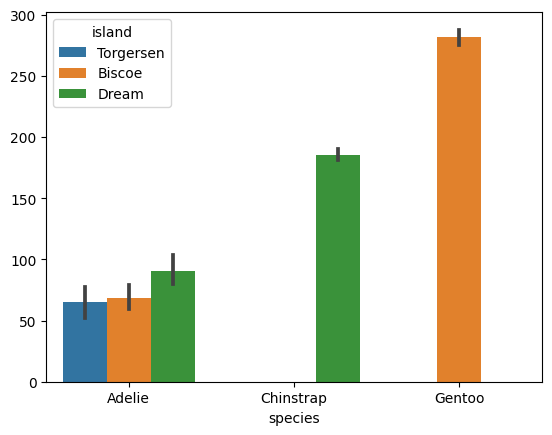

In [ ]:
sns.barplot(data=df, x="species", y=df.species.index, hue="island")

The graph shows the distrubtion of species according to the island. It is obvious that **Chinstrap** lives in island **Dream** only. While **Gentoo** lives in **Biscoe**. As well ass, **Adelie** live in **Torgersen, Biscoe, & Dream**.

---

<Axes: xlabel='species'>

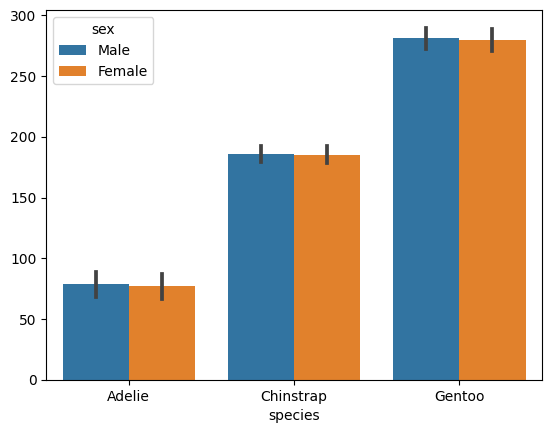

In [ ]:
sns.barplot(data=df, x="species", y=df.species.index, hue="sex")

The graph demonstrates the distrubtion of the species with respect to its gender. All types mostly have the same distrubtion for both genders.

---

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

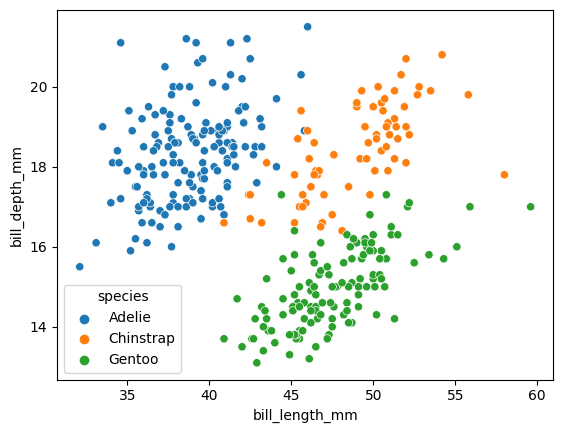

In [ ]:
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

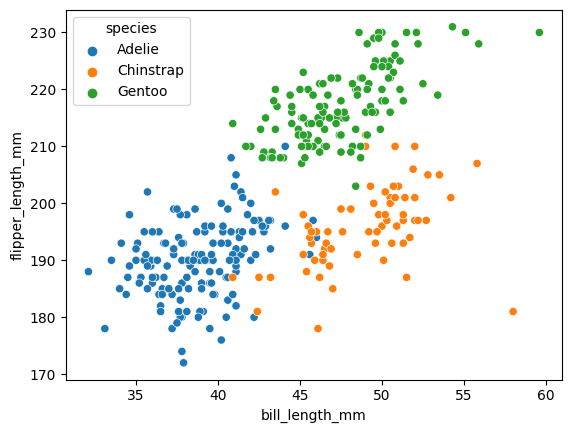

In [ ]:
sns.scatterplot(data=df, x="bill_length_mm", y="flipper_length_mm", hue="species")

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

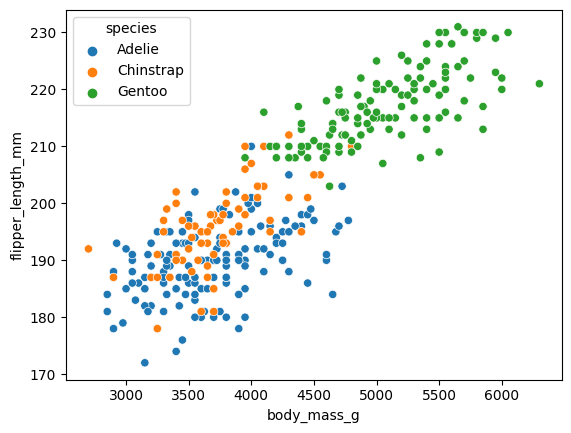

In [ ]:
sns.scatterplot(data=df, x="body_mass_g", y="flipper_length_mm", hue="species")

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

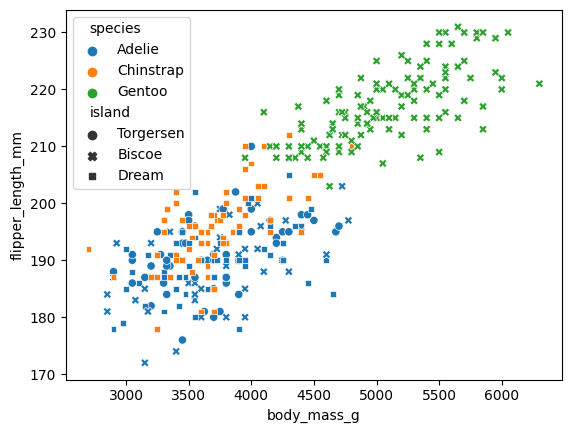

In [ ]:
sns.scatterplot(data=df, x="body_mass_g", y="flipper_length_mm", hue="species", style="island")

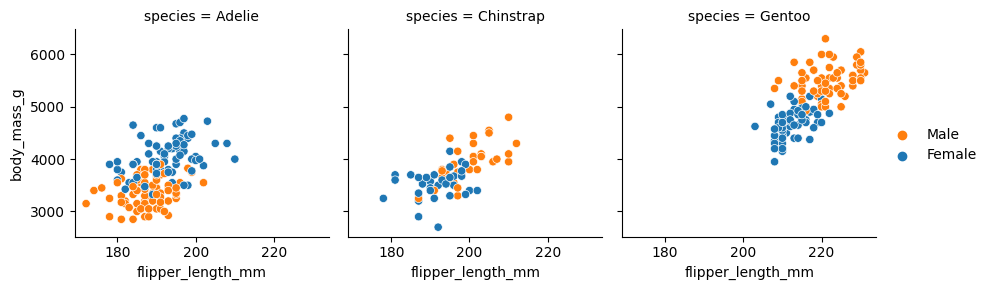

In [ ]:
plot = sns.FacetGrid(df, col="species")
plot.map_dataframe(sns.scatterplot, x="flipper_length_mm", y="body_mass_g", hue="sex")
plot.add_legend()

#### Detecting missing values

Display general info about the dataset, and to find which columns got missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


From the first sight, it is clear that (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex) columns got missing values.

---

Finds the number of missing values in each column.

In [ ]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Check if the dataset has an empty rows **(full empty)**.

In [ ]:
print(f"Number of empty records = {df.isnull().all(axis=1).sum()}")
df[df.isnull().all(axis=1)]

Number of empty records = 0


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


Displays the rows that contain empty values.

In [ ]:
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


It's noticable that there are two rows that have **2** values filled out from **7**.

---

We have multiple features with missing values, in the following step we will discuess how to handle these features.

## 3. Address any data quality issues, such as missing values and outliers. Decide on an appropriate strategy for handling missing data, such as imputation or removal of rows/columns.

### Handling missing data

#### **Handling missing data** for the two rows that have 2 filled values only, with percentage of **(**0.7142857**)**, the rows will be **dropped**.

In [ ]:
# Calculate the NaN percentage for each row
nan_percentages = df.isna().mean(axis=1)

# Set a threshold percentage for NaN values
thresh = 0.7

# Drop rows with NaN percentage above the threshold
df = df[nan_percentages < thresh]

**Once again**, display rows that have empty values

In [ ]:
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


It's clear that the two rows were dropped **sucessfully**.

---

Now, let's check again the columns that got empty values.

In [ ]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

Now, only **sex** feature has null values.

---

#### **Handling missing data** for sex feature

First of all, we will find the percentage of males and females.

In [ ]:
print(df.groupby('sex')['species'].count() / df['sex'].shape[0])

sex
Female    0.482456
Male      0.491228
Name: species, dtype: float64


From the first sight, we exclude the mean as an imputation.

---

Now, we will find the correlation between the features in order to decide which feature to use in order to impute the **sex feature**.

<Axes: >

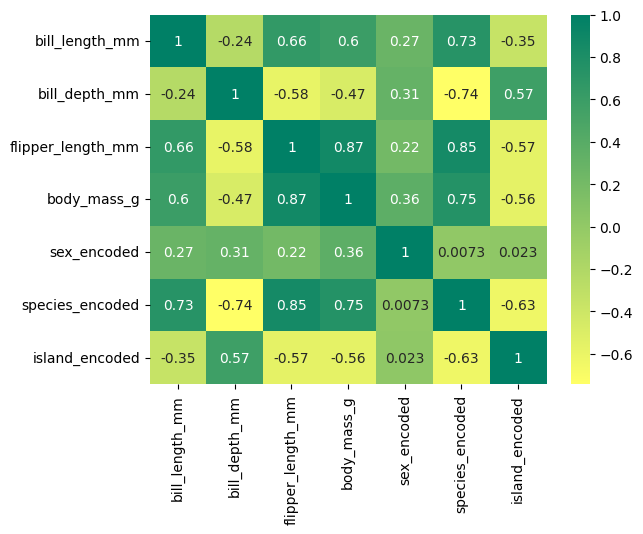

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create a copy of the original DataFrame to mainting the original DataFrame
df_corr=df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical feature
df_corr['sex_encoded'] = label_encoder.fit_transform(df_corr['sex'])
df_corr['species_encoded'] = label_encoder.fit_transform(df_corr['species'])
df_corr['island_encoded'] = label_encoder.fit_transform(df_corr['island'])


# Drop categorical features
df_corr.drop(['sex','species', 'island'],axis=1,inplace=True)

correlation = df_corr.corr()
sns.heatmap(correlation, annot=True, cmap = 'summer_r')

**Sex** feature is highly correlated with **body_mass_g** feature, so we will use it to impute the missing values.

---

We will plot **body_mass_g** according to the gender.

sex
Female    3862.272727
Male      4545.684524
Name: body_mass_g, dtype: float64
sex
Female    3650.0
Male      4300.0
Name: body_mass_g, dtype: float64
sex
Female    666.172050
Male      787.628884
Name: body_mass_g, dtype: float64


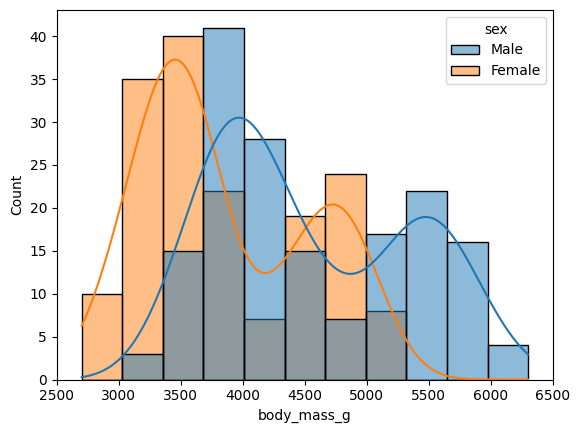

In [ ]:
sns.histplot(data=df, x="body_mass_g", hue="sex", kde=True)
plt.xlim([2500, 6500])
print(df.groupby('sex')['body_mass_g'].mean())
print(df.groupby('sex')['body_mass_g'].median())
print(df.groupby('sex')['body_mass_g'].std())

It is clear that the data is not normaly distrubted, so we can't use the mean. We may use **median**.

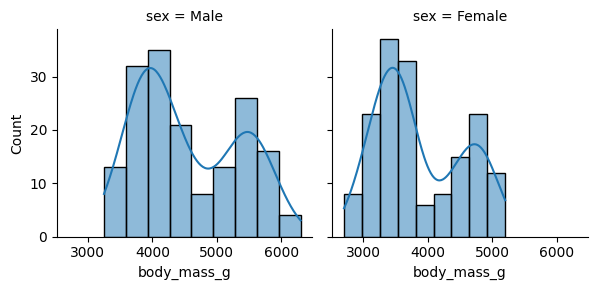

In [ ]:
plot = sns.FacetGrid(df, col="sex")
plot.map_dataframe(sns.histplot, x="body_mass_g", kde=True)
plot.add_legend()

Two plots of **body_mass_g** distrubtion according to each gender.

---

**Imputation**: we will impute the missing values according to the median value. However, our threshold is the summation of the male and female body_mass_g medians divided by 2.


thresh = (f_median + m_median)/2

Any value greater than or equal this threshold is considered male, otherwise it is a female.

In [ ]:
import pandas as pd

medians = df.groupby('sex')['body_mass_g'].median()

thresh = (medians['Male'] + medians['Female'])/2

# Create a copy of the df DataFrame where the body_mass_g feature is greater or equal to 167
df_G = df.loc[df['body_mass_g'] >= thresh].copy()

# Create a copy of the df DataFrame where the body_mass_g feature is less that 167
df_L = df.loc[df['body_mass_g'] < thresh].copy()

# Fill the sex missing values in the df_G by male
df_G['sex'].fillna(value='male', inplace=True)

# Fill the sex missing values in the df_L by female
df_L['sex'].fillna(value='female', inplace=True)

# Reconstruct the df DataFrame by concatinaing the three sub Dataframes; df_L, df_G, and df_NaN
df = pd.concat([df_L, df_G], axis=0)

print('The distribution of sex categories in the DataFrame following the replacement of missing values.')
print(df.groupby('sex')['species'].count() / df['sex'].shape[0])

print('\n\nInformation about the DataFrame')
print(df.isnull().sum())

The distribution of sex categories in the DataFrame following the replacement of missing values.
sex
Female    0.482456
Male      0.491228
female    0.011696
male      0.014620
Name: species, dtype: float64


Information about the DataFrame
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


Now, we finished filling the missing values.

### **Detecting outliers**

We have different ways to detect outliers such as: boxplot,interquartile range, and z-score.

---

#### Detecting **[bill_length_mm]** outliers

First method, detecting outliers using boxplot.

<Axes: >

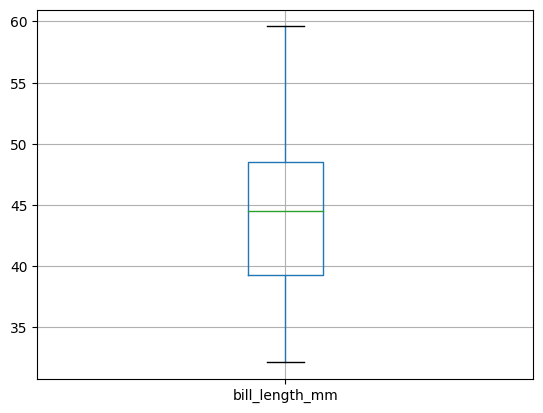

In [ ]:
df.boxplot(column=['bill_length_mm'])

It is clear that this feature doesn't have any outlier. But, we will use another way (**interquartile range**) to detect outliers.

In [ ]:
# Compute percentiles using Pandas quantile() function
percentile_25 = df['bill_length_mm'].quantile(0.25)
percentile_50 = df['bill_length_mm'].quantile(0.5)
percentile_75 = df['bill_length_mm'].quantile(0.75)

print("25th Percentile:", percentile_25)
print("50th Percentile:", percentile_50)
print("75th Percentile:", percentile_75)

# Compute interquartile range (IQR)
iqr = percentile_75 - percentile_25
print("Interquartile Range (IQR):", iqr)

LowerBound_bill_length_mm = percentile_25 - 1.5*iqr
UpperBound_bill_length_mm = percentile_75 + 1.5*iqr
print(f"Lower Bound = {LowerBound_bill_length_mm}, and Upper Bound = {UpperBound_bill_length_mm}")

25th Percentile: 39.225
50th Percentile: 44.45
75th Percentile: 48.5
Interquartile Range (IQR): 9.274999999999999
Lower Bound = 25.312500000000004, and Upper Bound = 62.412499999999994


In [ ]:
NumRecordsBefore=df.shape[0]
DroppedRecords=df[(df['bill_length_mm'] < LowerBound_bill_length_mm) | (df['bill_length_mm'] > UpperBound_bill_length_mm)].shape[0]
print(f"Number of outliers based on the Interquartile Range and Boxplots is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of outliers based on the Interquartile Range and Boxplots is 0 (0.0%)


#### Detecting **[bill_depth_mm]** outliers

<Axes: >

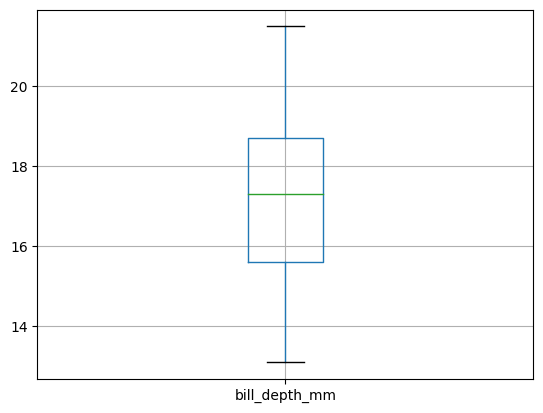

In [ ]:
df.boxplot(column=['bill_depth_mm'])

As mentioned before, this feature doesn't contain any outlier.

In [ ]:
mean=df['bill_depth_mm'].mean()
std=df['bill_depth_mm'].std()
print(f"For the bill_depth_mm feature, the mean = {mean} and standard deviaton = {std} ")

LowerZScore_bill_depth_mm = mean - 2.5*std
UpperZScore_bill_depth_mm = mean + 2.5*std
print(f"Lower Z-Score = {LowerZScore_bill_depth_mm}, and Upper Z-Score = {UpperZScore_bill_depth_mm}")

For the bill_depth_mm feature, the mean = 17.151169590643278 and standard deviaton = 1.9747931568167814 
Lower Z-Score = 12.214186698601324, and Upper Z-Score = 22.08815248268523


In [ ]:
NumRecordsBefore=df.shape[0]
df = df[(df['bill_depth_mm'] >= LowerZScore_bill_depth_mm) & (df['bill_depth_mm'] <= UpperZScore_bill_depth_mm)]
NumRecordsAfter=df.shape[0]
DroppedRecords=NumRecordsBefore-NumRecordsAfter
print(f"Number of detected outliers is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of detected outliers is 0 (0.0%)


#### Detecting **[flipper_length_mm]** outliers

<Axes: >

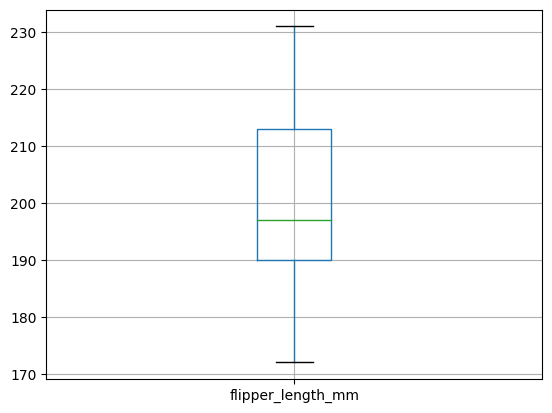

In [ ]:
df.boxplot(column=['flipper_length_mm'])

It's clear from the plot that the feature doesn't contain any outlier.

#### Detecting **[body_mass_g]** outliers

In [ ]:
# Compute percentiles using Pandas quantile() function
percentile_25 = df['body_mass_g'].quantile(0.25)
percentile_50 = df['body_mass_g'].quantile(0.5)
percentile_75 = df['body_mass_g'].quantile(0.75)

print("25th Percentile:", percentile_25)
print("50th Percentile:", percentile_50)
print("75th Percentile:", percentile_75)

# Compute interquartile range (IQR)
iqr = percentile_75 - percentile_25
print("Interquartile Range (IQR):", iqr)

LowerBound_body_mass_g = percentile_25 - 1.5*iqr
UpperBound_body_mass_g = percentile_75 + 1.5*iqr
print(f"Lower Bound = {LowerBound_body_mass_g}, and Upper Bound = {UpperBound_body_mass_g}")

25th Percentile: 3550.0
50th Percentile: 4050.0
75th Percentile: 4750.0
Interquartile Range (IQR): 1200.0
Lower Bound = 1750.0, and Upper Bound = 6550.0


In [ ]:
NumRecordsBefore=df.shape[0]
DroppedRecords=df[(df['body_mass_g'] < LowerBound_body_mass_g) | (df['body_mass_g'] > UpperBound_body_mass_g)].shape[0]
print(f"Number of outliers based on the Interquartile Range and Boxplots is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of outliers based on the Interquartile Range and Boxplots is 0 (0.0%)


We don't have any outlier, also to ensure the confirmed results. We will plot the boxplot to visualize the result.

<Axes: >

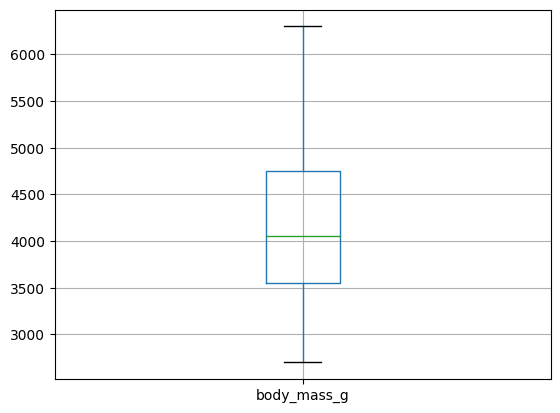

In [ ]:
df.boxplot(column=['body_mass_g'])

## 5. If the dataset contains categorical variables, encode them into a numerical format suitable for machine learning models.

Our dataset contains three categorical features: **species, island, sex**. There are two encoding methods: **One hot encoding**, and **Label encoding**.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical feature
df_encoded['species_encoded'] = label_encoder.fit_transform(df_encoded['species'])
df_encoded['island_encoded'] = label_encoder.fit_transform(df_encoded['island'])
df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])

# Drop categorical features
df_encoded.drop(['species','island', 'sex'],axis=1,inplace=True)

df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_encoded,island_encoded,sex_encoded
0,39.1,18.7,181.0,3750.0,0,2,1
1,39.5,17.4,186.0,3800.0,0,2,0
2,40.3,18.0,195.0,3250.0,0,2,0
4,36.7,19.3,193.0,3450.0,0,2,0
5,39.3,20.6,190.0,3650.0,0,2,1


I used label encoder for the three features, because I don't want to increase the number of features in my model, and in our case, there are no difference between them.

## Split the data into X, y

In [ ]:
X, y = df_encoded.drop('species_encoded', axis=1), df_encoded.species_encoded

We splitted the data into input [X] and output [y], our target feature is the **species** of the penguin. It is possible to use other features, but after testing other features, the best accuracy is obtained when using species as the target feature.

## 4. Analyze the relevance of each feature for your machine learning task by using the learned use feature selection techniques.

We have different methods to filter our features: **variance, information gain, chi-squared test, & correlation coefficient**. We know that **information gain** *identifies features that are most informative for predicting the target variable*, so we will use it to filter the features.

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Apply IG
selector = SelectKBest(mutual_info_classif, k=4)
X_filtered = selector.fit_transform(X, y)
X_filtered

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

We filtered our features. However, k=4 and k=3 both works and keeps the accuracy 1, but after dimensionality reduction we will have a **drop** in the accuracy.

---

Filtered features are **sex_encoded & body_mass_g**, so we will drop them. However, we can drop **island_encoded** but we will face a drop in the accuracy.

In [ ]:
df_filtered = X.drop(['sex_encoded', 'body_mass_g'], axis = 1)

In [ ]:
df_filtered

,bill_length_mm,bill_depth_mm,flipper_length_mm,island_encoded
0,39.1,18.7,181.0,2
1,39.5,17.4,186.0,2
2,40.3,18.0,195.0,2
4,36.7,19.3,193.0,2
5,39.3,20.6,190.0,2
...,...,...,...,...
338,47.2,13.7,214.0,0
340,46.8,14.3,215.0,0
341,50.4,15.7,222.0,0
342,45.2,14.8,212.0,0


---

Now, we will use a model to measure the accuracy after dropping out the **island_encoded** feature.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the original features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Apply chi-squared test
selector = SelectKBest(mutual_info_classif, k=4)
X_train_info_gain = selector.fit_transform(X_train, y_train)
X_test_info_gain = selector.transform(X_test)

# Train a classifier on the selected features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_info_gain, y_train)
y_pred = clf.predict(X_test_info_gain)
accuracy_new = accuracy_score(y_test, y_pred)


print(f"Number of original features: {X_train.shape[1]}")
print(f"Number of features after information gain (IG) filtering: {X_train_info_gain.shape[1]}")
print(f"Accuracy of Original features (testing accuracy): {accuracy}")
print(f"Accuracy after information gain (IG) filtering (testing accuracy): {accuracy_new}")

Number of original features: 6
Number of features after information gain (IG) filtering: 4
Accuracy of Original features (testing accuracy): 1.0
Accuracy after information gain (IG) filtering (testing accuracy): 1.0


It is clear that the accuracy is the same after dropping the two features. However, this is the best case solution because I tried four methods with different parameters.

## 7. Scale or normalize the numerical features to ensure consistent scaling across variables.

### **Scaling**

We have two ways to scale the data: **min-max & standardization.** I will use Min-Max scaling to maintain the relative differences in the values, and to keep the shape of the distrubtion is as the original data.

In [ ]:
# Import the MinMaxScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the DataFrame 'df_filtered', which computes the minimum and maximum values for scaling
scaler.fit(df_filtered[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'island_encoded']])

# Transform and scale the data
data = scaler.transform(df_filtered[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'island_encoded']])

# Create a new DataFrame 'df_scaler' to store the scaled data, maintaining column names from 'df'
df_scaler = pd.DataFrame(data, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'island_encoded'])

# Create a KMeans object with the desired number of clusters (4 in this case)
km = KMeans(n_clusters=4)

# Fit the KMeans model to the data
km.fit(df_scaler[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'island_encoded']])

# Predict the cluster labels for each data point based on the fitted model
cluster = km.predict(df_scaler[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'island_encoded']])

# Create a new column 'cluster' in the DataFrame to store the predicted cluster labels
df_scaler['cluster'] = cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


After that, we will measure the accuracy after scaling the features to ensure the consistency of our data.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaler, y, test_size=0.2, random_state=42)

# Train a classifier on the selected features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_new = accuracy_score(y_test, y_pred)

print(f"Accuracy after scaling (testing accuracy): {accuracy_new}")

Accuracy after scaling (testing accuracy): 1.0


The accuracy is the same.

### **Visualization**

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

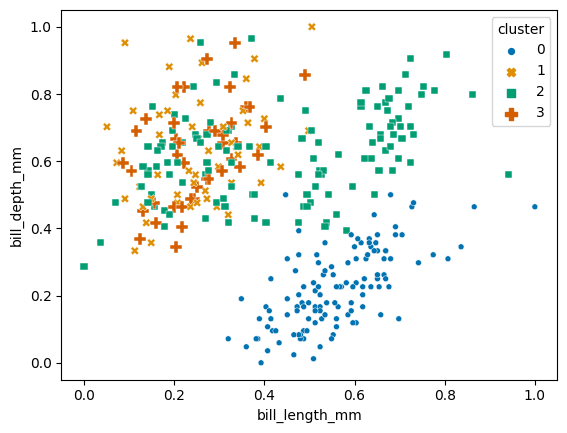

In [ ]:
# Create a scatter plot:
# - x-axis
# - y-axis
# - 'hue' parameter assigns different colors to data points based on the 'cluster' column
# - 'style' parameter assigns different markers/styles to data points based on the 'cluster' column
# - 'size' parameter adjusts the size of data points based on the 'cluster' column
# - 'palette' parameter defines the color palette used for the plot
sns.scatterplot(x=df_scaler['bill_length_mm'], y=df_scaler['bill_depth_mm'], hue=df_scaler['cluster'], style=df_scaler['cluster'], size=df_scaler['cluster'], palette='colorblind')

After scaling, we now can see the relation between the two features and how the data is grouped into four clusters.

---

For further plots, I will demonstrate some relationships between the features.

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

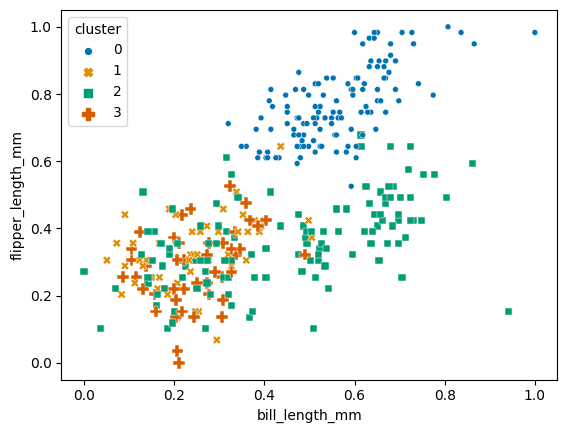

In [ ]:
sns.scatterplot(x=df_scaler['bill_length_mm'], y=df_scaler['flipper_length_mm'], hue=df_scaler['cluster'], style=df_scaler['cluster'], size=df_scaler['cluster'], palette='colorblind')

<Axes: xlabel='island_encoded', ylabel='bill_length_mm'>

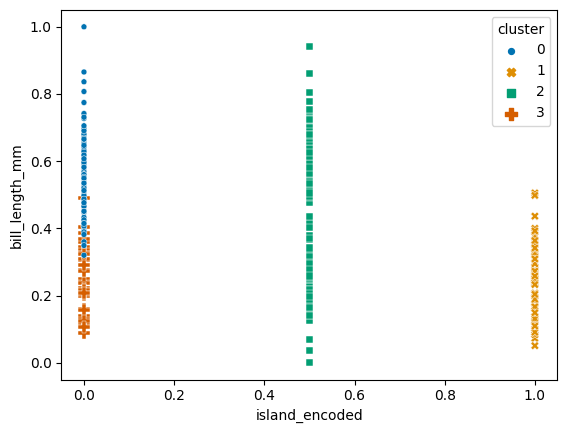

In [ ]:
sns.scatterplot(x=df_scaler['island_encoded'], y=df_scaler['bill_length_mm'], hue=df_scaler['cluster'], style=df_scaler['cluster'], size=df_scaler['cluster'], palette='colorblind')

## 6. Split the dataset into training and testing subsets to evaluate the performance of your machine learning models.

Now, we will split the data into training and testing subsets after **addressing quality issues, encoding features, filtering, and scaling**.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaler, y, test_size=0.2, random_state=42)

## 8. Apply suitable dimensionality reduction techniques to reduce the size of the data while preserving important information.

**Principal Component Analysis (PCA)**: PCA is one of the most widely used techniques for reducing the dimensionality of data.

In [ ]:
from sklearn.decomposition import PCA

# Create PCA instance and fit to the data
pca = PCA(n_components=5)  # Specify the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

For **n_components**, I used different values from 1-5, both **1 & 5** retain on accuracy = 1.0.

## 9. Validate your preprocessing pipeline by training and evaluating a machine learning model, such as the Random Forest model, on the preprocessed data. Compare the results to the model trained on the raw data **(before feature filtering, transformation, and reduction)** to ensure that preprocessing has improved model performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the original features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_b, y_train_b)
y_pred_b = clf.predict(X_test_b)
accuracy = accuracy_score(y_test_b, y_pred_b)

# Train a classifier on the retained PCA components and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
accuracy_variance = accuracy_score(y_test, y_pred)

print(f"Accuracy of Original features (testing accuracy): {accuracy}")
print(f"Accuracy after PCA (testing accuracy): {accuracy_variance}")

Accuracy of Original features (testing accuracy): 1.0
Accuracy after PCA (testing accuracy): 1.0


As a result, after preprocessing the dataset, the accuracy retained the same (1.0) because I chose the best methods with nearly the best values for parameters.

---

**NOTE**: sometimes the accuracy drops to 0.98, and sometimes it's 1.0, this is due to the randomness in PCA, I tried my best to keep it 1.0, but in case you tried to run it again.